<a href="https://colab.research.google.com/github/Yoshibansal/Machine-learning/blob/main/Neural%20Network/E19CSE332_MNIST_Lab_8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yoshi Bansal

E19CSE332

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
#instance of dataset
mnist = tf.keras.datasets.mnist

In [ ]:
#load data
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

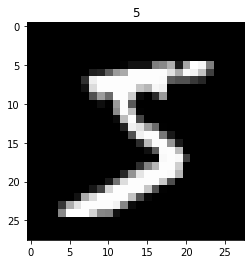

In [ ]:
#@title Index
index = 0 #@param {type:"slider", min:0, max:100, step:1}
import matplotlib.pyplot as plt

plt.imshow(training_images[index], cmap='gray')
plt.title(training_labels[index])
plt.show()

In [ ]:
#normalize
training_images = training_images/255.0
testing_images = testing_images/255.0

#reshaping data
training_images = training_images.reshape(60000, 784)
testing_images = testing_images.reshape(10000, 784)

In [ ]:
#Common function

%matplotlib inline

import matplotlib.image as mping
import matplotlib.pyplot as plt

def plot(history):
  acc = history.history['accuracy']
  loss = history.history['loss']

  epochs = range(len(acc))

  #plot training and validation accuracy per epoch
  plt.plot(epochs, acc, 'r', label="Training accuracy")
  plt.title('Training accuracy')
  plt.figure()

  #plot training and validation loss per epoch
  plt.plot(epochs, loss, 'r', label="Training loss")
  plt.title('Training loss')
  plt.figure()

### PART-1

In [ ]:
#@title Nodes
nodes = 32 #@param ["4", "32", "128", "512", "2056"] {type:"raw"}
INPUT_SHAPE = (784,)

#model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(nodes, activation = tf.nn.relu, input_shape=INPUT_SHAPE),
                             tf.keras.layers.Dense(nodes, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2056)              1613960   
_________________________________________________________________
dense_13 (Dense)             (None, 2056)              4229192   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                20570     
Total params: 5,863,722
Trainable params: 5,863,722
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
              optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
    )

In [ ]:
EPOCHS = 10

history = model.fit(
    training_images, 
    training_labels, 
    epochs=EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 91s 48ms/step - loss: 0.1850 - accuracy: 0.9442
Epoch 2/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0855 - accuracy: 0.9745
Epoch 3/10
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0623 - accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0527 - accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 89s 47ms/step - loss: 0.0422 - accuracy: 0.9877
Epoch 6/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0351 - accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0324 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0301 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0272 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 89s 48m

In [ ]:
#evaluating the model on test data

test_loss, test_acc = model.evaluate(testing_images, testing_labels)

#printing the loss and accuracy of trained model on test dataset
print("loss on test data: ", test_loss)
print('accuracy on test data: ', test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.1059 - accuracy: 0.9813
loss on test data:  0.105887770652771
accuracy on test data:  0.9812999963760376


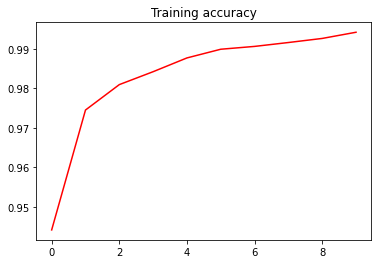

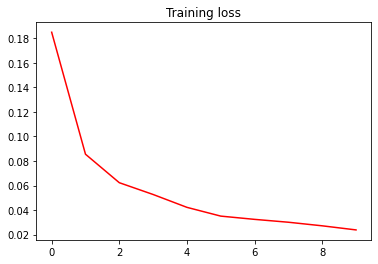

<Figure size 432x288 with 0 Axes>

In [ ]:
plot(history)

RESULTS for PART-1

Training accuracy
#### 4
    Epoch 10/10
    1875/1875 [==============================] - 3s 1ms/step - loss: 0.6516 - accuracy: 0.7969

#### 32
    Epoch 10/10
    1875/1875 [==============================] - 3s 2ms/step - loss: 0.0579 - accuracy: 0.9816

#### 128
    Epoch 10/10
    1875/1875 [==============================] - 4s 2ms/step - loss: 0.0193 - accuracy: 0.9939

#### 512
    Epoch 10/10
    1875/1875 [==============================] - 13s 7ms/step - loss: 0.0175 - accuracy: 0.9942

#### 2056
    Epoch 10/10
    1875/1875 [==============================] - 89s 48ms/step - loss: 0.0238 - accuracy: 0.9942


## 128 IS BEST


### PART-2

In [ ]:
#@title Epochs

#common process
def train(model):
  EPOCHS = 10 #@param ["10", "30"] {type:"raw"}
  batch_size = 128

  #compile
  model.compile(
                optimizer = 'adam', 
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy']
      )



  #fit
  history = model.fit(
      training_images,
      training_labels,
      batch_size=batch_size, 
      epochs=EPOCHS,
      verbose=2)



  #evaluating the model on test data
  test_loss, test_acc = model.evaluate(testing_images, testing_labels)

  #printing the loss and accuracy of trained model on test dataset
  print("loss on test data: ", test_loss)
  print('accuracy on test data: ', test_acc)

  prediction = model.predict(testing_images[10:11])
  prediction = prediction[0]
  print('Prediction\n',prediction)
  print('\nThresholded output\n',(prediction>0.5)*1)
  print("True Value\n", testing_labels[10])

  plot(history)

Number of Hidden layers -> **3**

In [ ]:
INPUT_SHAPE = (784,)

#model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(32, activation = tf.nn.relu, input_shape=INPUT_SHAPE),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_65 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_66 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_67 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_68 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
469/469 - 1s - loss: 0.5081 - accuracy: 0.8447
Epoch 2/10
469/469 - 1s - loss: 0.2018 - accuracy: 0.9393
Epoch 3/10
469/469 - 1s - loss: 0.1563 - accuracy: 0.9534
Epoch 4/10
469/469 - 1s - loss: 0.1333 - accuracy: 0.9592
Epoch 5/10
469/469 - 1s - loss: 0.1165 - accuracy: 0.9645
Epoch 6/10
469/469 - 1s - loss: 0.1053 - accuracy: 0.9677
Epoch 7/10
469/469 - 1s - loss: 0.0944 - accuracy: 0.9705
Epoch 8/10
469/469 - 1s - loss: 0.0884 - accuracy: 0.9731
Epoch 9/10
469/469 - 1s - loss: 0.0784 - accuracy: 0.9766
Epoch 10/10
469/469 - 1s - loss: 0.0751 - accuracy: 0.9763
313/313 [==============================] - 0s 1ms/step - loss: 0.1114 - accuracy: 0.9671
loss on test data:  0.11142329126596451
accuracy on test data:  0.9671000242233276
Prediction
 [9.9983084e-01 5.4412180e-07 6.5965141e-05 9.1806163e-07 6.1608798e-06
 6.5499125e-07 7.4388663e-07 1.3834324e-09 6.2380306e-05 3.1680829e-05]

Thresholded output
 [1 0 0 0 0 0 0 0 0 0]
True Value
 0


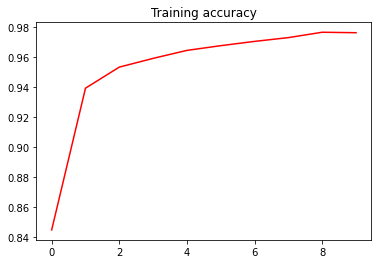

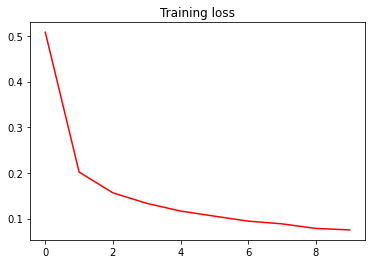

<Figure size 432x288 with 0 Axes>

In [ ]:
train(model)

Number of Hidden layers -> **4**

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_70 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_71 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_72 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_73 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_74 (Dense)             (None, 10)                330       
Total params: 29,674
Trainable params: 29,674
Non-trainable params: 0
_________________________________________________

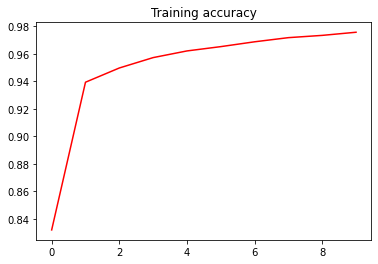

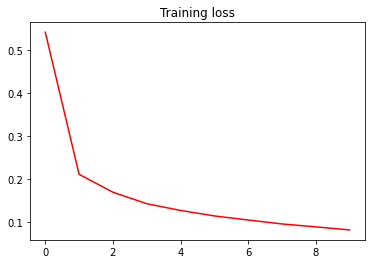

<Figure size 432x288 with 0 Axes>

In [ ]:
INPUT_SHAPE = (784,)

#model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(32, activation = tf.nn.relu, input_shape=INPUT_SHAPE),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.summary()

train(model)

Number of Hidden layers -> **8**

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_76 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_77 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_78 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_79 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_80 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_81 (Dense)             (None, 32)              

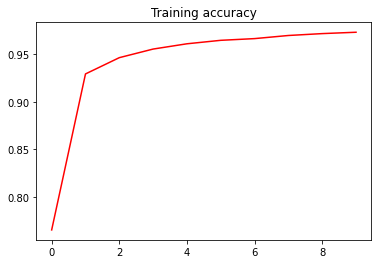

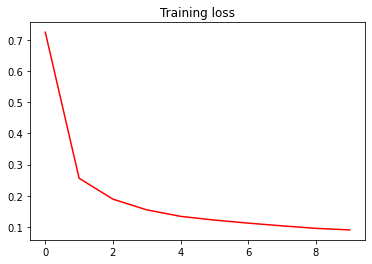

<Figure size 432x288 with 0 Axes>

In [ ]:
INPUT_SHAPE = (784,)

#model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(32, activation = tf.nn.relu, input_shape=INPUT_SHAPE),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.summary()

train(model)

Number of Hidden layers -> **16**

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_86 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_87 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_88 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_89 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_90 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_91 (Dense)             (None, 32)              

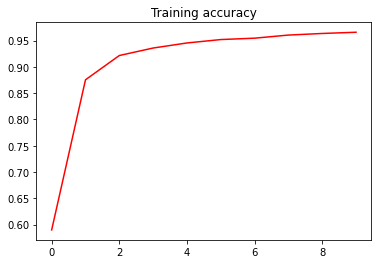

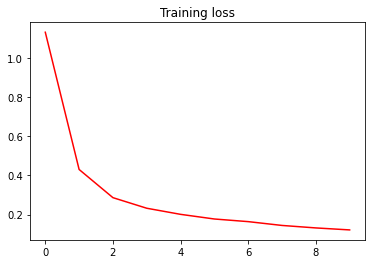

<Figure size 432x288 with 0 Axes>

In [ ]:
INPUT_SHAPE = (784,)

#model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(32, activation = tf.nn.relu, input_shape=INPUT_SHAPE),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.summary()

train(model)

### PART-3

Topology-1

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_104 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_105 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_106 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_107 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_108 (Dense)            (None, 10)                650       
Total params: 1,190,490
Trainable params: 1,190,490
Non-trainable params: 0
___________________________________________

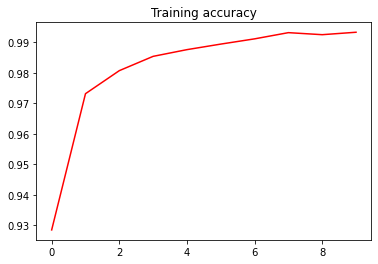

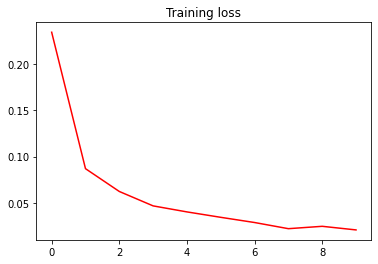

<Figure size 432x288 with 0 Axes>

In [ ]:
INPUT_SHAPE = (784,)

#model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(784, activation = tf.nn.relu, input_shape=INPUT_SHAPE),
                             tf.keras.layers.Dense(512, activation = tf.nn.relu),
                             tf.keras.layers.Dense(256, activation = tf.nn.relu),
                             tf.keras.layers.Dense(128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(64, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.summary()

train(model)

Topology-2

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_110 (Dense)            (None, 1028)              806980    
_________________________________________________________________
dense_111 (Dense)            (None, 1256)              1292424   
_________________________________________________________________
dense_112 (Dense)            (None, 1028)              1292196   
_________________________________________________________________
dense_113 (Dense)            (None, 512)               526848    
_________________________________________________________________
dense_114 (Dense)            (None, 10)                5130      
Total params: 4,539,018
Trainable params: 4,539,018
Non-trainable params: 0
___________________________________________

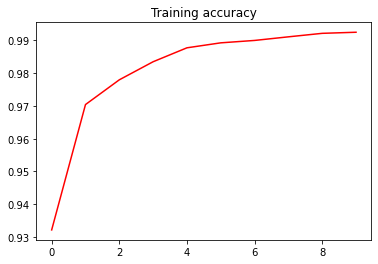

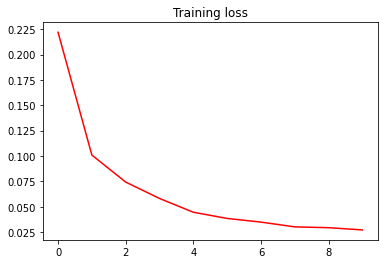

<Figure size 432x288 with 0 Axes>

In [ ]:
INPUT_SHAPE = (784,)

#model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(784, activation = tf.nn.relu, input_shape=INPUT_SHAPE),
                             tf.keras.layers.Dense(1028, activation = tf.nn.relu),
                             tf.keras.layers.Dense(1256, activation = tf.nn.relu),
                             tf.keras.layers.Dense(1028, activation = tf.nn.relu),
                             tf.keras.layers.Dense(512, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.summary()

train(model)

Topology-3

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_116 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_117 (Dense)            (None, 512)               33280     
_________________________________________________________________
dense_118 (Dense)            (None, 64)                32832     
_________________________________________________________________
dense_119 (Dense)            (None, 512)               33280     
_________________________________________________________________
dense_120 (Dense)            (None, 10)                5130      
Total params: 770,202
Trainable params: 770,202
Non-trainable params: 0
_______________________________________________

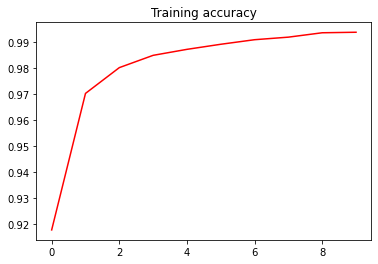

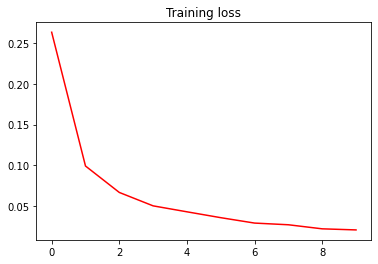

<Figure size 432x288 with 0 Axes>

In [ ]:
INPUT_SHAPE = (784,)

#model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(784, activation = tf.nn.relu, input_shape=INPUT_SHAPE),
                             tf.keras.layers.Dense(64, activation = tf.nn.relu),
                             tf.keras.layers.Dense(512, activation = tf.nn.relu),
                             tf.keras.layers.Dense(64, activation = tf.nn.relu),
                             tf.keras.layers.Dense(512, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.summary()

train(model)

Topology-4

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_121 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_122 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_123 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_124 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_125 (Dense)            (None, 256)               33024     
_________________________________________________________________
dense_126 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_127 (Dense)            (None, 10)              

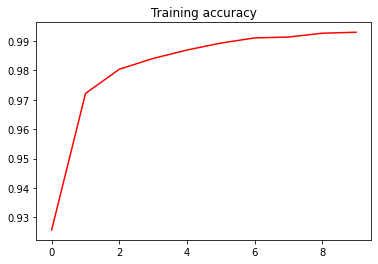

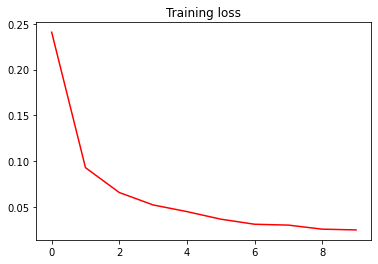

<Figure size 432x288 with 0 Axes>

In [ ]:
INPUT_SHAPE = (784,)

#model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(784, activation = tf.nn.relu, input_shape=INPUT_SHAPE),
                             tf.keras.layers.Dense(512, activation = tf.nn.relu),
                             tf.keras.layers.Dense(256, activation = tf.nn.relu),
                             tf.keras.layers.Dense(128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(256, activation = tf.nn.relu),
                             tf.keras.layers.Dense(512, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.summary()

train(model)

DATASET-SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

DATASET_SIZE = 70000
TRAIN_RATIO = 0.7
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.1

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

In [ ]:
#normalize
training_images = X_train/255.0
validation_images = X_val/255.0
testing_images = X_test/255.0

#reshaping data
training_images = training_images.reshape(48999, 784)
validation_images = validation_images.reshape(14000, 784)
testing_images = testing_images.reshape(7001, 784)

In [ ]:
INPUT_SHAPE = (784,)

#model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(128, activation = tf.nn.relu, input_shape=INPUT_SHAPE),
                             tf.keras.layers.Dense(64, activation = tf.nn.relu),
                             tf.keras.layers.Dense(32, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_129 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_130 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_131 (Dense)            (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
              optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [ ]:
#fit
history = model.fit(
    training_images,
    y_train,
    batch_size=128, 
    epochs=10,
    verbose=2)

Epoch 1/10
383/383 - 2s - loss: 0.3928 - accuracy: 0.8845
Epoch 2/10
383/383 - 1s - loss: 0.1495 - accuracy: 0.9562
Epoch 3/10
383/383 - 1s - loss: 0.1036 - accuracy: 0.9688
Epoch 4/10
383/383 - 1s - loss: 0.0788 - accuracy: 0.9758
Epoch 5/10
383/383 - 1s - loss: 0.0618 - accuracy: 0.9804
Epoch 6/10
383/383 - 1s - loss: 0.0505 - accuracy: 0.9838
Epoch 7/10
383/383 - 1s - loss: 0.0410 - accuracy: 0.9870
Epoch 8/10
383/383 - 1s - loss: 0.0307 - accuracy: 0.9904
Epoch 9/10
383/383 - 1s - loss: 0.0286 - accuracy: 0.9904
Epoch 10/10
383/383 - 1s - loss: 0.0252 - accuracy: 0.9914


219/219 [==============================] - 0s 1ms/step - loss: 0.0946 - accuracy: 0.9750
loss on test data:  0.09463615715503693
accuracy on test data:  0.9750036001205444
Prediction
 [5.8247838e-09 2.0685353e-07 1.0044793e-06 5.6238619e-10 1.9316034e-02
 2.2447037e-07 8.7836568e-08 9.8068213e-01 1.9233038e-08 2.4580822e-07]

Thresholded output
 [0 0 0 0 0 0 0 1 0 0]
True Value
 0


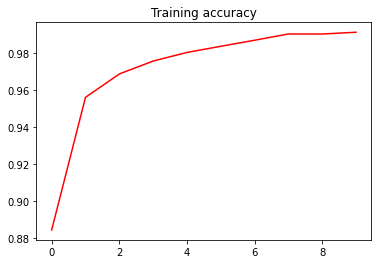

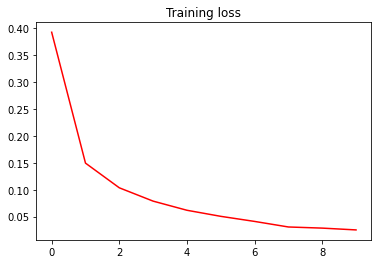

<Figure size 432x288 with 0 Axes>

In [ ]:
#evaluating the model on test data
test_loss, test_acc = model.evaluate(testing_images, y_test)

#printing the loss and accuracy of trained model on test dataset
print("loss on test data: ", test_loss)
print('accuracy on test data: ', test_acc)

prediction = model.predict(testing_images[10:11])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)
print("True Value\n", testing_labels[10])

plot(history)